<h1><center>CS 464</center></h1>
<h1><center>Introduction Machine Learning</center></h1>
<h1><center>Spring 2019</center></h1>
<h1><center>Homework 3</center></h1>

<h3><center>Due: May 21, 2019 23:59</center></h3>

## Instructions

<ul>
    <li>This homework contains both written and programming questions about neural networks. You should implement your programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells. You should upload this .ipynb file with the computed output cells for each code cell.
    </li>
    <li>
        For questions that you need to plot, your plot results have to be included in cell output.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use different libraries than given libraries which are defined in the required packages section.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
        In this homework, you have to implement programming questions on <b>Python 3</b> version programming language.
    </li>
    <li>
        While submitting the homework file, please package your notebook(".ipynb") files as a gzipped TAR file or a ZIP file with the name CS464_HW3_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and report file. Upload your homework to Moodle.
    </li>
    <li>
        Any violation of these rules may lead to significant grade deduction.
    </li>
    <li>
        if your code cell does not return outputs correctly, you will lose points for the corresponding question.
    </li>
    <li> You can send an email for your questions to <b>can.uner@bilkent.edu.tr</b> address.</li>
    <li> You can use Google Colab or your own local environment for this homework. You can prefer Google Colab since you have access to GPUs. You do not have to use GPUs to complete this homework though. If you prefer to use your local system, you should follow the below "Environmental Setup" instructions.</li>
</ul>

## Environment Setup

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries create "requirements.txt" file which contains given required packages and run following command in the activated "hw3" environment<br>
        <i>> pip install -r requirements.txt<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>

### Pytorch Installation

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

If your system has appropriate GPU Driver, CUDA and CuDNN installations, then you can use GPU supported PyTorch as well.

### Required Packages

Additional required packages except PyTorch and Torchvision are defined below.

In [0]:
"""
numpy
pandas
Pillow
matplotlib
scikit-image
scipy
"""

'\nnumpy\npandas\nPillow\nmatplotlib\nscikit-image\nscipy\n'

## Question 1 - 35 pts

In this question, you are going to implement a Convolutional Neural Network (CNN) to solve the indoor scene recognition problem. The provided subset of [MIT Indoor67 dataset](http://web.mit.edu/torralba/www/indoor.html) contains images of 10 indoor categories which are <i>bakery, toyshop, dining room, bathroom, library, pool inside, gym, bowling, computer room, hospital room.</i>

In this question, you are going to compare transfer learning and from scratch training approaches.

### Q1.a. Data Loader - 10 pts

We provide you a subset of MIT Indoor dataset. Download our version of MIT Indoor10 dataset from Moodle. You have to implement a custom data loader for the indoor dataset. You can visit [link](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) to implement such a data loader. There will be a comparison of training approaches in this question. <b>Both approaches have to use exactly the same splits (training, test, and validation) to make their performance results comparable.</b>

1. <font color=blue>\[Code\]</font> Split the dataset as training, test, and validation sets. For each class, 20% of its samples should be in test set and 10% of its samples should be in the validation set. 
2. <font color=blue>\[Code\]</font> Apply appropriate augmentations to the set(s) for which it is essential.
3. <font color=blue>\[Written\]</font> Give details about data loading and augmentation steps. How many training, test and validation samples do exist for each class? Do you need to apply augmentations for training, test, and validation sets? Why or why not?

In [0]:
# USE THIS CODE CELL TO SPECIFY ROOT PATH FOR THE DATASET.

# IF YOU USE GOOGLE COLAB, DATA PATH EXAMPLE: 
# root_dir = '/content/gdrive/My\ Drive/CS464/HW3/indoor_data'
# -------------------------------------------------------


# IF YOU USE LOCAL ENVIRONMENT, DATA PATH EXAMPLE:
# root_dir = '/home/user/CS464/HW3/indoor_data'
# -------------------------------------------------------

from google.colab import drive

drive.mount('/content/gdrive')
!cp /content/gdrive/My\ Drive/indoor_data.zip /content/
!unzip indoor_data.zip



root_dir = '/content/indoor_data/'  # change the value of root_dir variable as your root path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  indoor_data.zip
replace indoor_data/bakery/144215_Delicious_bakery_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: indoor_data/bakery/144215_Delicious_bakery_0.jpg  
replace indoor_data/bakery/bakery_21_10_yahoo.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: indoor_data/bakery/bakery_21_10_yahoo.jpg  
  inflating: indoor_data/bakery/asian_bakery.jpg  
  inflating: indoor_data/bakery/bakery.jpg  
  inflating: indoor_data/bakery/bakery09.jpg  
  inflating: indoor_data/bakery/bakery1.jpg  
  inflating: indoor_data/bakery/bakery1b.jpg  
  inflating: indoor_data/bakery/bakery2b.jpg  
  inflating: indoor_data/bakery/bakery34.jpg  
  inflating: indoor_data/bakery/bakery7.jpg  
  inflating: indoor_data/bakery/bakery8.jpg  
  inflating: indoor_data/bakery/bakery_09_11_yahoo.jpg  
  inflating: indoor_data/bakery/bakery_01_01_altavista

In [0]:
# USE THIS CODE CELL TO IMPLEMENT YOUR DATA LOADER

import numpy as np
import torch
import PIL
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision as tv
from torchvision.datasets import ImageFolder
from torchvision import transforms, models


from torch.utils.data.sampler import SubsetRandomSampler

# USE THIS CODE CELL TO IMPLEMENT YOUR DATA LOADER



def load_dataset(datadir, valid_size = 0.1, test_size = 0.2, batch_size = 32, is_pretrained = True):
  
    torch.manual_seed(1)
    torch.cuda.manual_seed(1)
    if is_pretrained == False:
        pre_trans  = transforms.Compose([ transforms.Resize((224,224)),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.ToTensor()
                                           ])
    elif  is_pretrained == True:
        pre_trans = transforms.Compose([ transforms.Resize((224,224)),
                                            transforms.RandomHorizontalFlip(),
                                            
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                           ])
  
    train_transforms = pre_trans
    validation_transforms = pre_trans
    test_transforms = pre_trans
    
   
    
    train_data = ImageFolder(datadir, transform=train_transforms)
    val_data = ImageFolder(datadir, transform= validation_transforms)
    test_data = ImageFolder(datadir, transform=test_transforms)
    
    
    num_train = len(train_data)
    index = list(range(num_train))

    
    split_val = int(np.floor(valid_size * num_train))
    split_test = int(np.floor(test_size * num_train))
    np.random.seed(0)
    np.random.shuffle(index)
   
    other_idx, test_idx = index[split_test:], index[:split_test]
    train_idx, val_idx  = other_idx[split_val:], other_idx[:split_val]
    
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    
    
    train_loader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(val_data, sampler = val_sampler, batch_size = batch_size)
    test_loader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
    return train_loader, val_loader,test_loader






The dataset is loaded from Google Drive. Resizing is applied to 224x224x3 RGB image since ResNet50 model takes this size, also random horizontal flip is applied, toTensor transformation is applied. If model is pretrained then normalization is applied using subraction of ImageNet mean and dividing standart deviation. If it is not pretrained, then normalization augmentation was not applied, since the images has different mean and standart deviation. There are total 2163 images for all classes. 1515 train images, 216 validation images, 432 test images. 
We should apply normalization and toTensor()(1/255.0 rescaling) data augmentation 

### Q1.b. Convolutional Neural Network (CNN) - 5 pts

The torchvision package contains of popular datasets, model architectures, and common image transformations for computer vision. In this question, you are going to use one of the well known CNN models which already exist in torchvision. Visit [link](https://pytorch.org/docs/stable/torchvision/models.html) to explore models in torchvision. Remember that using deeper or wider networks may increase your training time.
1. <font color=blue>\[Code\]</font> Write your own CNN class which is inherited from torch.nn.Module class. This class should have a network that you select among torchvision models as an instance member.
2. <font color=blue>\[Written\]</font> State the model you selected and explain why you picked that model. Did you need to modify any part of this model to adopt to your task? 

In [0]:
# USE THIS CODE CELL TO DEFINE CNN CLASS


import torch 
import torch.nn as nn


class TransferCNN(torch.nn.Module):
  
  def __init__(self, is_pretrained=True, class_number=10):
    
    super(TransferCNN,self).__init__()
    
    self.is_pretrained = is_pretrained
    self.class_number = class_number
    
    self.model = models.resnet50(pretrained=self.is_pretrained)
    if is_pretrained == True :
      for param in self.model.parameters():
        param.requires_grad = False
    else:
      for param in self.model.parameters():
        param.requires_grad = True
        
    self.model.fc = nn.Sequential( 
                             nn.Linear(2048, 512),
                             nn.BatchNorm1d(512),
                             nn.ReLU(inplace=True),
        
                             nn.Linear(512, 256),
                             nn.BatchNorm1d(256),
                             nn.ReLU(inplace=True),
                            
        
                             nn.Linear(256, 64),
                             nn.BatchNorm1d(64),
                             nn.ReLU(inplace=True),
        
        
        
                             nn.Linear(64, 16),
                             nn.BatchNorm1d(16),
                             nn.ReLU(inplace=True),
        
                             nn.Linear(16, self.class_number)
                            )
    
  def forward(self, x):
        
        return self.model.forward(x)
      
  def accuracy_topk(self,output, target, topk=(5,)):
      """Computes the accuracy over the k top predictions for the specified values of k"""
      with torch.no_grad():
          maxk = max(topk)
          batch_size = target.size(0)

          _, pred = output.topk(maxk, 1, True, True)
          pred = pred.t()
          correct = pred.eq(target.view(1, -1).expand_as(pred))

          res = []
          for k in topk:
              correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
              res.append(correct_k.mul_(1.0 / batch_size))
          
          return res[0].data.cpu().numpy()[0]



I select ResNet50 pretrained model since the model size is small relative to other pretrained models  and  has good performance on ImageNet dataset. I changed top layers to learn high level feature space from got from early layers. My top layer has output size 10 since there are 10 classes in our new indoor dataset. Fully connected approach is used for designing top layers. BatchNorm1d used as regularization since using Dropout will affect result of BatchNormalization is used in Resnet50 model architecture.( Dropout and BatchNormalization does not use together.)


### Q1.c. Transfer Learning vs Training from Scratch - 13 pts

In this question, are going to compare two different learning approaches: Transfer learning and Learning from scratch. Thanks to using the already implemented CNN model from torchvision, you can easily convert your randomly initialized network to a pretrained network. Do not forget that you are going to solve a multiclass classification problem. According to that, you need to carefully select the appropriate loss function. You need to select appropriate values for hyper-parameters. You need to use SGD optimizer for this question. Use the training, validation and test splits you created Q1.a. Note that you will NOT perform cross validation. Evaluate your network performance after each epoch by using the validation set. Use matplotlib library for plotting figures.

1. <font color=blue>\[Code\]</font> Implement training and validation functions for both strategies. You have to print out average values of training loss, training accuracy, validation loss and validation accuracy for each epoch.
2. <font color=blue>\[Figure\]</font> For the from-scratch-trained model, plot training loss and training accuracy of each iteration (update). Also plot validation loss and accuracy at each epoch. 
3. <font color=blue>\[Figure\]</font> For the transfer learning applied model, plot training loss and training accuracy of each iteration (each update). Also plot validation loss and accuracy at each epoch.
4. <font color=blue>\[Code\]</font> Your models are going to run up to the max epoch parameter.  According to the validation results, pick the best models for both training approaches. You are going to use these models at the test phase. You need to save them in ".pth" files.
5. <font color=blue>\[Written\]</font> Which loss function did you use? Why did you choose it?
6. <font color=blue>\[Written\]</font> What are the differences between transfer learning and from scratch learning.
7. <font color=blue>\[Written\]</font> Explain how you selected hyperparameters for both strategies. Did you need to make any hyperparameter changes? 

In [0]:
# USE THIS CODE CELL TO SPECIFY YOUR BEST MODEL PATHS THAT WILL BE USED TO SAVE MODELS.

FROM_SCRATCH_MODEL_PATH = 'scratch_model_q1.pth' # change the value of FROM_SCRATCH_MODEL_PATH variable as your path
TRANSFER_LEARNING_MODEL_PATH = 'transfer_model_q1.pth' # change the value of TRANSFER_LEARNING_MODEL_PATH variable as your path

In [0]:
# USE THIS CODE CELL TO WRITE TRAINING AND VALIDATION FUNCTIONS WHICH ARE COMMON FOR BOTH LEARNING APPROACH.
# PARAMETERS OF TRANING CODE MAY DIFFER ACCORDING TO LEARNING APPROACH.

# --- Representative Code Snippet ---
from torch.autograd import Variable

def train(model, criterion, optimizer, train_loader ):

    train_loss = []
    train_acc = []
    
   
    model.train()
    for  x, target in train_loader:
        
        optimizer.zero_grad()
        
        x, target = x.cuda(), target.cuda()
        x, target = Variable(x), Variable(target)
        out = model(x)
        loss = criterion(out, target)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        train_acc.append(model.accuracy_topk(out, target, (1,))) 

    return np.mean(train_loss), np.mean(train_acc)
  
  
  
def evaluation(model, criterion, optimizer, val_loader):
  
    model.eval()
    val_loss = []
    val_acc =[]

    with torch.no_grad():
       
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss.append(loss.item())
            val_acc.append(model.accuracy_topk(outputs, labels, (1,)))
            
    return np.mean(val_loss), np.mean(val_acc)

In [0]:
# RUN TRAIN FUNCTION FOR THE FROM SCRATCH APPROACH IN THIS CELL.
# PRINT OUT REQUIRED METRICS FOR EACH EPOCH.
# EVALUATE YOUR MODEL AND SAVE THE BEST MODEL ACCORDING TO VALIDATION METRICS.


# --- Representative Code Snippet ---

# from_scratch_hyperparameters = {...}
batch_size = 32
lr_rate = 1e-3
epoch =20
momentum =0.99
decay = 1e-3
device = 'cuda'
is_pretrained = False
np.random.seed(0)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
train_loader,val_loader, test_loader  = load_dataset(root_dir, batch_size = batch_size, is_pretrained=is_pretrained)

train_loss = []
train_acc = []
val_loss =[]
val_acc =[]

model = TransferCNN(is_pretrained).cuda()
optimizer = optim.SGD(model.parameters(), lr=lr_rate, momentum = momentum, weight_decay=decay, nesterov = True)
criterion = nn.CrossEntropyLoss()
best_val_acc = 0#float('inf')



for i in range(epoch):
  loss_t, acc_t = train(model, criterion, optimizer, train_loader) 
  loss_v, acc_v = evaluation(model, criterion, optimizer, val_loader)
  
  train_loss.append(loss_t)
  train_acc.append(acc_t)
  
  val_loss.append(loss_v)
  val_acc.append(acc_v)
  
  if acc_v > best_val_acc:
    best_val_acc = acc_v
    torch.save({
            'epoch': epoch,
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict()}, FROM_SCRATCH_MODEL_PATH)
  
  print('Epoch : {} >>> Train Loss : {:.5f} | Train Acc : {:.5f} || Val Loss : {:.5f} | Val Acc : {:.5f}'.format(
        i+1, loss_t, acc_t, loss_v, acc_v))
    


Epoch : 1 >>> Train Loss : 2.30920 | Train Acc : 0.12624 || Val Loss : 26.84026 | Val Acc : 0.03125
Epoch : 2 >>> Train Loss : 2.22459 | Train Acc : 0.20289 || Val Loss : 3.47685 | Val Acc : 0.16815
Epoch : 3 >>> Train Loss : 2.15855 | Train Acc : 0.24716 || Val Loss : 2.41751 | Val Acc : 0.19643
Epoch : 4 >>> Train Loss : 2.09621 | Train Acc : 0.24254 || Val Loss : 2.07820 | Val Acc : 0.24256
Epoch : 5 >>> Train Loss : 2.02976 | Train Acc : 0.24603 || Val Loss : 2.06815 | Val Acc : 0.23810
Epoch : 6 >>> Train Loss : 1.95310 | Train Acc : 0.28693 || Val Loss : 1.81899 | Val Acc : 0.35565
Epoch : 7 >>> Train Loss : 1.86198 | Train Acc : 0.34553 || Val Loss : 1.73925 | Val Acc : 0.38095
Epoch : 8 >>> Train Loss : 1.75331 | Train Acc : 0.37991 || Val Loss : 1.62848 | Val Acc : 0.38988
Epoch : 9 >>> Train Loss : 1.64874 | Train Acc : 0.43709 || Val Loss : 1.64497 | Val Acc : 0.46577
Epoch : 10 >>> Train Loss : 1.60011 | Train Acc : 0.45478 || Val Loss : 1.52232 | Val Acc : 0.48363
Epoch : 

In [0]:
# RUN TRAIN FUNCTION FOR THE TRANSFER LEARNING APPROACH IN THIS CELL.
# PRINT OUT REQUIRED METRICS FOR EACH EPOCH.
# EVALUATE YOUR MODEL AND SAVE THE BEST MODEL ACCORDING TO VALIDATION METRICS.


# --- Representative Code Snippet ---
batch_size = 32
lr_rate = 1e-3
epoch =20
momentum =0.99
decay = 1e-3
device = 'cuda'
is_pretrained = True
np.random.seed(0)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
train_loader,val_loader, test_loader  = load_dataset(root_dir, batch_size = batch_size, is_pretrained=is_pretrained)

train_loss_t = []
train_acc_t = []
val_loss_t =[]
val_acc_t =[]

model = TransferCNN(is_pretrained).cuda()
optimizer = optim.SGD(model.parameters(), lr=lr_rate, momentum = momentum, weight_decay=decay, nesterov = True)
criterion = nn.CrossEntropyLoss()
best_val_acc = 0#float('inf')



for i in range(epoch):
  loss_t, acc_t = train(model, criterion, optimizer, train_loader) 
  loss_v, acc_v = evaluation(model, criterion, optimizer, val_loader)
  
  train_loss_t.append(loss_t)
  train_acc_t.append(acc_t)
  
  val_loss_t.append(loss_v)
  val_acc_t.append(acc_v)
  
  if acc_v > best_val_acc:
    best_val_acc = acc_v
    torch.save({
            'epoch': epoch,
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict()}, TRANSFER_LEARNING_MODEL_PATH)
  
  print('Epoch : {} >>> Train Loss : {:.5f} | Train Acc : {:.5f} || Val Loss : {:.5f} | Val Acc : {:.5f}'.format(
        i+1, loss_t, acc_t, loss_v, acc_v))
    

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 151661552.68it/s]


Epoch : 1 >>> Train Loss : 2.13968 | Train Acc : 0.32386 || Val Loss : 1.90103 | Val Acc : 0.61905
Epoch : 2 >>> Train Loss : 1.71436 | Train Acc : 0.65501 || Val Loss : 1.36287 | Val Acc : 0.71131
Epoch : 3 >>> Train Loss : 1.21414 | Train Acc : 0.71822 || Val Loss : 0.92847 | Val Acc : 0.79167
Epoch : 4 >>> Train Loss : 0.84289 | Train Acc : 0.78338 || Val Loss : 0.72333 | Val Acc : 0.83185
Epoch : 5 >>> Train Loss : 0.55161 | Train Acc : 0.84387 || Val Loss : 0.48216 | Val Acc : 0.85863
Epoch : 6 >>> Train Loss : 0.35505 | Train Acc : 0.89921 || Val Loss : 0.43835 | Val Acc : 0.87202
Epoch : 7 >>> Train Loss : 0.27833 | Train Acc : 0.93052 || Val Loss : 0.49533 | Val Acc : 0.87798
Epoch : 8 >>> Train Loss : 0.16997 | Train Acc : 0.95117 || Val Loss : 0.34549 | Val Acc : 0.88988
Epoch : 9 >>> Train Loss : 0.17317 | Train Acc : 0.95318 || Val Loss : 0.34043 | Val Acc : 0.90030
Epoch : 10 >>> Train Loss : 0.13445 | Train Acc : 0.95721 || Val Loss : 0.41120 | Val Acc : 0.87351
Epoch : 1

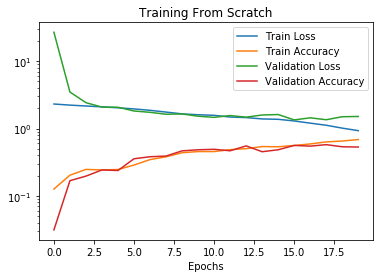

In [0]:
# USE THIS CODE CELL TO PLOT METRICS FOR THE FROM SCRATCH LEARNING [Answer: Q1.c.2]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epoch), train_loss, label='Train Loss')
plt.plot(range(epoch), train_acc, label='Train Accuracy')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.title("Training From Scratch")
plt.legend()
plt.xlabel("Epochs")

plt.yscale("log")


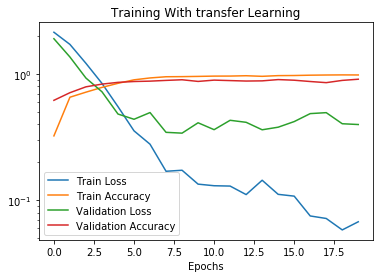

In [0]:
# USE THIS CODE CELL TO PLOT METRICS FOR THE TRANSFER LEARNING [Answer: Q1.c.3]
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epoch), train_loss_t, label='Train Loss')
plt.plot(range(epoch), train_acc_t, label='Train Accuracy')
plt.plot(range(epoch), val_loss_t, label='Validation Loss')
plt.plot(range(epoch), val_acc_t, label='Validation Accuracy')
plt.title("Training With transfer Learning")
plt.legend()
plt.xlabel("Epochs")
plt.yscale("log")


<b>Answer for Q1.c.5:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>



I used categorical cross entropy since our dataset contains 10 classes and softmax activation function.  


<b>Answer for Q1.c.6:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>


Transfer learning is using the pretrained weigths Imagenet  dataset therefore, the  pretrained model already  learns early layers kernels that essential for all images that could indicate edges, blobs etc.  However, the training from scratch initialize its weights randomly(other than xavier or he initializations), therefore more epochs is required  to get same level of the validation accuracy.

<b>Answer for Q1.c.7:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>


 I select hyperparamater according  to random search for learning rate, weight decay, momentum rate and batch size. I could change the number of epochs since the training from scratch requiring more epochs. However, I want to see same epoch number results for comprasion between two methods.
 

### Q1.d. Test Classifiers - 7 pts

You should have obtained two trained networks so far. One of them comes from a transfer learning approach and the other network is from from-scratch-trained approach. In this case, you need to compare these two trained networks by using the test set.

1. <font color=blue>\[Code\]</font> Load saved '.pth' file for the model that trained with the transfer learning approach. Test this model by using the test set.
2. <font color=blue>\[Code\]</font> Load saved '.pth' file for the model that trained from scratch. Test this model by using the test set.
3. <font color=blue>\[Figure\]</font> Provide confusion matrix for the results of [1.] question.
4. <font color=blue>\[Figure\]</font> Provide confusion matrix for the results of [2.] question.
5. <font color=blue>\[Figure\]</font> Display randomly selected 20 images from the test set with the predicted and ground truth labels. Show these images in a grid (4x5).
6. <font color=blue>\[Written\]</font> Give the test set accuracy values for these two models. Which training approach does work better than the other? Explain why?

In [0]:
# USE THIS CODE CELL TO IMPLEMENT TEST FUNCTION WHICH IS COMMON FOR BOTH MODEL

# --- Representative Code Snippet ---
def test(model, criterion, optimizer, test_loader):
  model.eval()
  test_loss = []
  test_acc =[]
  label = []
  output = []
  image = [] 

  with torch.no_grad():

      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          loss = criterion(outputs, labels)
          output.extend(np.argmax(outputs.cpu().numpy(),axis=1))
          label.extend(labels.cpu().numpy())
          image.extend(images.cpu().numpy())
          test_loss.append(loss.item())
          test_acc.append(model.accuracy_topk(outputs, labels, (1,)))

  return np.mean(test_loss), np.mean(test_acc), np.array(output), np.array(label), np.array(image)

In [0]:
# USE THIS CODE CELL TO LOAD BEST MODEL WHICH USES TRANSFER LEARNING APPROACH
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

batch_size = 32
lr_rate = 1e-3
epoch =20
momentum =0.99
decay = 1e-3
device = 'cuda'





is_pretrained = True
model = TransferCNN(is_pretrained).cuda()
optimizer = optim.SGD(model.parameters(), lr=lr_rate, momentum = momentum, weight_decay=decay, nesterov = True)
criterion = nn.CrossEntropyLoss()

checkpoint = torch.load(TRANSFER_LEARNING_MODEL_PATH)


model.load_state_dict(checkpoint["model"])
optimizer.load_state_dict(checkpoint['optimizer'])
model.eval()
np.random.seed(0)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
train_loader,val_loader, test_loader  = load_dataset(root_dir, batch_size = 32, is_pretrained=is_pretrained)
loss_t_t, acc_t_t, outputs_t, labels_t, images_t = test(model, criterion, optimizer, test_loader)
print("Test Accuracy : {} Test Loss  : {} ".format(acc_t_t, loss_t_t))


Test Accuracy : 0.875 Test Loss  : 0.43594843787806375 


In [0]:
# USE THIS CODE CELL TO LOAD BEST MODEL WHICH IS TRAINED FROM SCRATCH
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS
del model
is_pretrained = False
model = TransferCNN(is_pretrained).cuda()
optimizer = optim.SGD(model.parameters(), lr=lr_rate, momentum = momentum, weight_decay=decay, nesterov = True)
criterion = nn.CrossEntropyLoss()

checkpoint = torch.load(FROM_SCRATCH_MODEL_PATH)

model.load_state_dict(checkpoint["model"])
optimizer.load_state_dict(checkpoint['optimizer'])
model.eval()
np.random.seed(0)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
train_loader,val_loader, test_loader  = load_dataset(root_dir, batch_size = 32, is_pretrained=is_pretrained)
loss_t, acc_t, outputs, labels, images = test(model, criterion, optimizer, test_loader)
print("Test Accuracy : {} Test Loss  : {} ".format(acc_t, loss_t))

Test Accuracy : 0.4977678656578064 Test Loss  : 1.5911664877619063 


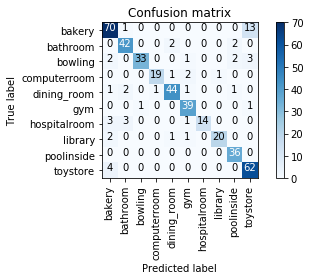

In [0]:
# USE THIS CODE CELL TO CREATE CONFUSION MATRIX [Answer: Q1.d.3]
# YOU CAN USE sklearn.metrics package to compute confusion matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

def plot_conf_matrix(cm, classes, title='Confusion matrix',cmap=plt.cm.Blues):
  
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],  'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.savefig("conf_batch_mini.png", layout = 'tight', dpi=300)
    
    
from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(labels_t, outputs_t)
classes = train_loader.dataset.classes
plot_conf_matrix(cm, classes )

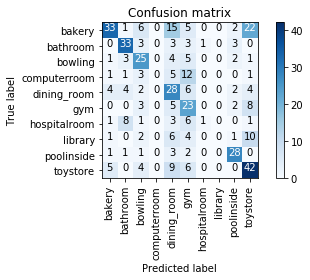

In [0]:
# USE THIS CODE CELL TO CREATE CONFUSION MATRIX [Answer: Q1.d.4]
# YOU CAN UbSE sklearn.metrics package to compute confusion matrix
import itertools
def plot_conf_matrix(cm, classes, title='Confusion matrix',cmap=plt.cm.Blues):
  
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j],  'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    #plt.savefig("conf_batch_mini.png", layout = 'tight', dpi=300)
    
    
from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(labels, outputs)
classes = train_loader.dataset.classes
plot_conf_matrix(cm, classes )

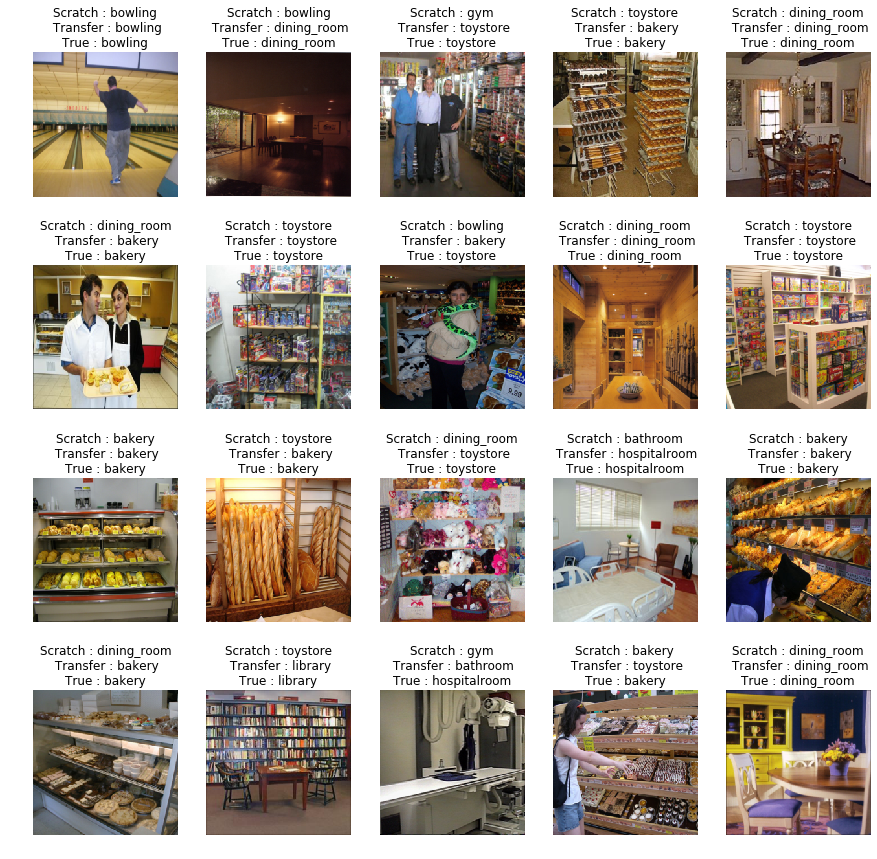

In [0]:
# USE THIS CODE CELL TO DISPLAY RANDOMLY SELECTED TEST SAMPLES WITH THEIR PREDICTED AND TARGET LABELS [Answer: Q1.d.5]
import random

random.seed(2019)

random_images = random.sample(range(0, 431), 20)

imagesx = images[random_images] 

outputsx = outputs[random_images]
labelsx = labels[random_images]
outputsy = outputs_t[random_images]
_, axs = plt.subplots(4, 5, figsize=(15, 15))
axs = axs.flatten()
classes = train_loader.dataset.classes
for i, img, ax in zip(range(20),imagesx, axs):
    img = img.transpose((1, 2, 0))
  
    inp =  img 
    inp = np.clip(inp, 0, 1)
    inp *= 255.0
    
    ax.title.set_text("Scratch : {}\n Transfer : {}\nTrue : {}".format(str(classes[outputsx[i]]),str(classes[outputsy[i]]), str(classes[labelsx[i]])))
    ax.axis("off")
    ax.imshow(inp.astype(np.uint8))
plt.show()

<b>Answer for Q1.d.6:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

The test accuracy for scratch model is 0.46875 and the test accuracy for transfer learning model is 0.9151785969734192.  The transfer learning model worked better since the test accuracy was better given same hyperparameters. The pretrained  model weights were trained by million images, therefore, the learning feautures are more general and powerful relative to scratch model and also the more epoch may help to increase accuracy of scratch model, the model has very powerful that at the end, the model could eventually overfit with dataset.

## Question 2 - 65 pts

In this question, you are going to implement both a Convolutional Neural Network (CNN) architecture and a Multilayer Perceptron (MLP) to solve the bird type classification problem. As the dataset, you will use [Caltech-UCSD Birds-200-2011](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html) dataset. The dataset consists of 11.788 photos of 200 bird species. The dataset provides you bounding boxes, image labels, and training-test splits. DO NOT FORGET THAT YOU WILL NOT USE TRAINING-TEST SPLIT WHICH IS PROVIDED BY DATASET. YOU WILL SPLIT THE DATASET INTO TRAINING, TEST AND VALIDATION SETS YOURSELF.

You are free to choose your neural network architecture in this question but there will be a minimum performance threshold and your network's performance will affect your grade for this question. The thresholds and metric types are specified in corresponding questions.

<b>Note: You should be able to achieve these goals with training time < a day on a GPU.</b>

### Q2.a. Data Loader - 15 pts

In this question you are going to use [Caltech-UCSD Birds-200-2011](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html) dataset. Download the dataset from given [link](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html). You have to implement a custom data loader. Notice that photos are not tightly cropped. You may choose to crop images by using bounding boxes which exist in the dataset. Note that you will build CNN and MLP architectures and input types should be different for these networks. You should prepare data loaders by considering this situation. You may need to convert images to grayscale format to train the MLP model. <b>MLP and CNN architectures have to use exactly the same splits (training, test, and validation) to make their performance results comparable.</b>

1. <font color=blue>\[Code\]</font> Split the dataset as training, test, and validation sets. For each class, 20% of its samples should be in test set and 10% of its samples should be in the validation set. 
2. <font color=blue>\[Code\]</font> Apply appropriate augmentations to the set(s) for which it is essential.
3. <font color=blue>\[Written\]</font> Explain your augmentation method differences for two models? 



In [0]:
# USE THIS CODE CELL TO SPECIFY ROOT PATH FOR THE DATASET.

# IF YOU USE GOOGLE COLAB, DATA PATH EXAMPLE: 
# root_dir = '/content/gdrive/My\ Drive/CS464/HW3/CUB_200_2011'
# -------------------------------------------------------


# IF YOU USE LOCAL ENVIRONMENT, DATA PATH EXAMPLE:
# root_dir = '/home/user/CS464/HW3/CUB_200_2011'
# -------------------------------------------------------

from google.colab import drive
drive.mount('/content/gdrive')
!cp /content/gdrive/My\ Drive/bird/CUB_200_2011.tgz /content/
!tar -xzf CUB_200_2011.tgz 

root_dir = '/content/CUB_200_2011/images/' # change the value of root_dir variable as your root path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# USE THIS CODE CELL TO IMPLEMENT YOUR DATA LOADER

import numpy as np
import torch
import PIL
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision as tv
from torchvision.datasets import ImageFolder
from torchvision import transforms, models
import os
import cv2
from torch.utils.data.sampler import SubsetRandomSampler
#np.random.seed(2019)
import pandas as pd
# USE THIS CODE CELL TO IMPLEMENT YOUR DATA LOADER


def bounding_box_crop(root_dir='/content/CUB_200_2011/images/'):
  images = pd.read_csv("CUB_200_2011/images.txt", sep=" ", header=None).values
  
  try:
    bounding_boxes = pd.read_csv("CUB_200_2011/bounding_boxes.txt", sep=" ", header=None).values.astype(np.int)
  except:
    return
  for k in range(0,len(images)):  
    img_path = root_dir+images[k,1]


    img = cv2.imread(img_path)


    cv2.imwrite(img_path,img[bounding_boxes[k,2]:bounding_boxes[k,2]+bounding_boxes[k,4],bounding_boxes[k,1]:bounding_boxes[k,1]+bounding_boxes[k,3],:])
  
  os.system("rm -rf CUB_200_2011/bounding_boxes.txt")
    
def load_dataset(datadir, valid_size = 0.1, test_size = 0.2, img_size = 128, batch_size=32, is_cnn = True):
    bounding_box_crop()
    if is_cnn:
        pre_trans  = transforms.Compose([ 
                                             transforms.RandomRotation(30),
                                             transforms.Resize((img_size,img_size)),
                                             transforms.RandomHorizontalFlip(),
                                             transforms.ToTensor()
                                           ])
    else:
      
        pre_trans = transforms.Compose([    
                                            transforms.RandomRotation(45),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.Grayscale(num_output_channels=1),
                                          
                                            transforms.Resize((img_size,img_size)),
                                             
                                            transforms.ToTensor()
                               
                                           ])
  
    train_transforms = pre_trans
    validation_transforms = pre_trans
    test_transforms = pre_trans
    
   
    
    train_data = ImageFolder(datadir, transform=train_transforms)
    val_data = ImageFolder(datadir, transform= validation_transforms)
    test_data = ImageFolder(datadir, transform=test_transforms)
   
    
    num_train = len(train_data)
    index = list(range(num_train))
    
    split_val = int(np.floor(valid_size * num_train))
    split_test = int(np.floor(test_size * num_train))
    np.random.seed(0)
    torch.manual_seed(1)
    torch.cuda.manual_seed(1)
    np.random.shuffle(index)
   
    other_idx, test_idx = index[split_test:], index[:split_test]
    train_idx, val_idx  = other_idx[split_val:], other_idx[:split_val]
    
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    
    
    train_loader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(val_data, sampler = val_sampler, batch_size = batch_size)
    test_loader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)
   
    return train_loader, val_loader,test_loader
  

<b>Answer for Q2.a.3: </b> 

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

I convert RGB image to grayscale image and I add random rotation additionally because I experimented and saw that mlp model tends to be overfit easily.

### Q2.b. Multilayer Perceptron - 5 pts

Implement the MLP model to solve this multiclass classification problem. For the MLP model, <b>accuracy for the top-5 classes on the test set has to be minimum 50%</b>. You have to design your network according to this limitation. 

1. <font color=blue>\[Code\]</font> Write your own MLP class which is inherited from torch.nn.Module class.
2. <font color=blue>\[Written\]</font> How many layers are there in your network? How did you choose the number of layers? How many neurons are there in each layer? Did you use any activation functions? 

In [0]:
# USE THIS CODE CELL TO DEFINE MLP CLASS
 
from torch.autograd import Variable

torch.cuda.empty_cache() 
from torch.autograd import Variable

class Flatten(torch.nn.Module):
    def __init__(self):
        super(Flatten, self).__init__()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return x

class MLP(torch.nn.Module):
  
    def __init__(self, input_size = 128 * 128, class_number = 200):
     
        super(MLP, self).__init__()
      
        self.input_size = input_size
        self.class_number = class_number
       
        self.mlp_model = nn.Sequential(
            Flatten(),
            nn.Linear(self.input_size, 5000 ),
            nn.BatchNorm1d(5000),
   
            nn.ReLU(),
            
            
            nn.Linear(5000 , 2500),
            nn.BatchNorm1d(2500),
          
            nn.ReLU(),
           
            nn.Linear(2500, 1250),
            nn.BatchNorm1d(1250),
          
            nn.ReLU(),
          
            nn.Linear(1250, 625),
            nn.BatchNorm1d(625),
          
            nn.ReLU(),
          
             nn.Linear(625, 310),
            nn.BatchNorm1d(310),
          
            nn.ReLU(),
            
            nn.Linear(310, self.class_number)
        )
    def forward(self, x):
      
      x = self.mlp_model(x)
      
      return x
    
    
    def accuracy_topk(self,output, target, topk=(5,)):
      """Computes the accuracy over the k top predictions for the specified values of k"""
      with torch.no_grad():
          maxk = max(topk)
          batch_size = target.size(0)

          _, pred = output.topk(maxk, 1, True, True)
          pred = pred.t()
          correct = pred.eq(target.view(1, -1).expand_as(pred))

          res = []
          for k in topk:
              correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
              res.append(correct_k.mul_(1.0 / batch_size))
          
          return res[0].data.cpu().numpy()[0]

<b>Answer Q2.b.2:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>



I used 6 dense layers( dense layer : linear + batchnorm1d + relu ), a flattening layer and output linear layer, the total of 8 layer I used. I experiment with different number of layers and I observed that when the number of layer increase, the model learns better in terms of accuracy. the layer has size 5000,2500,1250,625,310,200 in order. I used ReLU activation function as a nonlinear activation function. 

### Q2.c. Convolutional Neural Network (CNN) - 8 pts

Implement the CNN model to solve this multiclass classification problem. For the CNN model, <b>accuracy fot the top-5 classes on the test set has to be minimum 75%</b>. You have to design your network according to that limitation. 

1. <font color=blue>\[Code\]</font> Write your own CNN class which is inherited from torch.nn.Module class.
2. <font color=blue>\[Written\]</font> How many layers are there in your network? How did you choose the number of layers? How did you choose kernel sizes for each convolutional layer? Did you use any activation functions? 

In [0]:
# USE THIS CODE CELL TO DEFINE CNN CLASS

from torch.autograd import Variable

class Flatten(torch.nn.Module):
    def __init__(self):
        super(Flatten, self).__init__()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return x
      
class DenseBlock(torch.nn.Module):
  
    def __init__(self, input_shape, output_shape, dropout= 0.1):
        super(DenseBlock, self).__init__()
       
        
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.dropout = dropout
        
        self.dense = nn.Sequential( nn.Linear(self.input_shape, self.output_shape),
                                    nn.BatchNorm1d(self.output_shape),
                                    nn.ReLU(),
                                    nn.Dropout(self.dropout))
        
        
    def forward(self,x):
      
      return self.dense.forward(x)
    
    
class CNNBlock(torch.nn.Module):
  
    def __init__(self, input_shape, output_shape, kernel_size = 3):
      
        super(CNNBlock, self).__init__()
        
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.kernel_size = kernel_size
        
        self.cnn = nn.Sequential( nn.Conv2d(self.input_shape, self.output_shape, self.kernel_size, padding=(self.kernel_size - 1)//2),
                                  nn.BatchNorm2d(self.output_shape),
                                  nn.ReLU(),
                                  nn.Conv2d(self.output_shape, self.output_shape, self.kernel_size, padding=(self.kernel_size - 1)//2),
                                  nn.BatchNorm2d(self.output_shape),
                                  nn.ReLU(),
                                  nn.Conv2d(self.output_shape, self.output_shape, self.kernel_size, padding=(self.kernel_size - 1)//2),
                                  nn.BatchNorm2d(self.output_shape),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2, stride=2))
    def forward(self,x):
      
        return self.cnn.forward(x)
    


class ConvNet(torch.nn.Module):
  
    def __init__(self,input_shape = (128,128,3), class_number = 200):
      
        super(ConvNet, self).__init__()
   
        self.input_shape = input_shape
        self.class_number = class_number
        
        self.dense_input_shape = self.input_shape[0]//16
        
        self.cnn_net = nn.Sequential( CNNBlock(3,64),
                                      CNNBlock(64,128),
                                      CNNBlock(128,256),
                                      CNNBlock(256,512),
                                      CNNBlock(512,512),
                                      Flatten(),
                                      DenseBlock(8192, 1024, 0.0 ),
                                      DenseBlock(1024, 512, 0.0),
                                      nn.Linear(512, self.class_number)
                                    )
        
    def forward(self,x):
        return self.cnn_net.forward(x)
      
    def accuracy_topk(self,output, target, topk=(5,)):
        """Computes the accuracy over the k top predictions for the specified values of k"""
        with torch.no_grad():
            maxk = max(topk)
            batch_size = target.shape[0]
                                      

            _, pred = output.topk(maxk, 1, True, True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
                res.append(correct_k.mul_(1 / batch_size))
           
            return res[0].data.cpu().numpy()[0] 

<b>Anser for Q2.c.2:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

How many layers are there in your network? How did you choose the number of layers? How did you choose kernel sizes for each convolutional layer? Did you use any activation functions?

I will regard this two compound as one layer Convolution layer (Conv2d+BatchNorm2d+ReLU) and Dense layer (Linear +BatchNorm1d+ReLU)
15 Convolution layer,  5 max pooling layer, 1 flatten layer, 2 dense layer, 1 output linear layer is used. Overall 24 layer is used. For convolution layers, I increase kernel number at each level of layers, since there should be less number of filters of basic features like edges, blobs, for late layers I increase kernel number since there are more high level feature should be extracted from images. I experimented that If the model is not adequate to learn I increased number of layers. I choose 3x3 kernel size, I connected three times as convolution layer. I did this because 3x3 kernels are faster and by concenating them you can get same effect  bigger kernel size like 7x7, 5x5( http://cs231n.github.io/convolutional-networks/ ). I used ReLU for intermediate layers and softmax for output layer

### Q2.d. Train MLP & CNN Networks - 13 pts

You are going to train MLP and CNN networks by using same training, validation and test samples. You have to solve a multiclass classification problem and you need to carefully select the appropriate loss function. You have minimum performance thresholds for both models. You need to select appropriate values for hyper-parameters to achieve these thresholds. You need to use SGD optimizer for this question. So far, you should have created three dataset splits for training, validation and testing. You will need to load these splits at this phase. Note that you will NOT perform cross validation. Evaluate your network performance after each epoch by using the validation set. Use matplotlib library for plotting figures.

1. <font color=blue>\[Code\]</font> Implement training and validation functions for both network architectures. You have to print out average values of training loss, training top-1 accuracy (accuracy of the most accurately predicted class), validation loss and validation top-1 accuracy for each epoch.
2. <font color=blue>\[Figure\]</font> For the MLP model, plot training loss and training top-1 accuracy of each iteration (each update). Also plot validation loss and validation top-1 accuracy at each epoch. 
3. <font color=blue>\[Figure\]</font> For the CNN model,  plot training loss and training top-1 accuracy of each iteration (each update). Also plot validation loss and validation top-1 accuracy at each epoch.
4. <font color=blue>\[Code\]</font> Your models are going to run up to the max epoch parameter.  According to validation results pick the best models for both architectures. You are going to use these models at the test phase. You need to save them in a ".pth" files.
5. <font color=blue>\[Written\]</font> Which loss function did you use? Why did you choose it?
6. <font color=blue>\[Written\]</font> Explain how you selected the hyperparameters of the training phases for both MLP and CNN models.

In [0]:
# USE THIS CODE CELL TO SPECIFY YOUR BEST MODEL PATHS THAT WILL BE USED TO SAVE MODELS.

BEST_MLP_PATH = 'mlp_q2.pth' # change the value of BEST_MLP_PATH variable as your path
BEST_CNN_PATH = 'cnn_q2.pth' # change the value of BEST_CNN_PATH variable as your path

In [0]:
# USE THIS CODE CELL TO WRITE TRAINING AND VALIDATION FUNCTIONS WHICH ARE COMMON FOR BOTH NETWORK ARCHITECTURES.
# PARAMETERS OF TRANING CODE MAY DIFFER ACCORDING TO NETWORK ARCHITECTURE.

# --- Representative Code Snippet ---
import numpy as np
def train(model, criterion, optimizer, train_loader):
  model.train()
  train_acc = []
  train_loss = []
  train_acc5 = []
  for  x, target in train_loader:
        
    optimizer.zero_grad()
 
    x, target = x.cuda(), target.cuda()
    x, target = Variable(x), Variable(target)
    out = model(x)
    loss = criterion(out, target)
    train_loss.append(loss.item())
    train_acc.append(model.accuracy_topk(out, target, (1,))) 
    train_acc5.append(model.accuracy_topk(out, target, (5,))) 
    loss.backward()
    optimizer.step()   
  return  np.mean(train_loss), np.mean(train_acc), np.mean(train_acc5)

def evaluation(model, criterion, optimizer, val_loader):
  
    model.eval()
    val_loss = []
    val_acc = []
    val_acc5 =  []

    with torch.no_grad():
       
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss.append(loss.item())
            val_acc.append(model.accuracy_topk(outputs, labels, (1,)))
            val_acc5.append(model.accuracy_topk(outputs, labels, (5,)))
            
    return np.mean(val_loss), np.mean(val_acc), np.mean(val_acc5)
   


In [0]:
# RUN TRAIN FUNCTION FOR THE MLP MODEL IN THIS CELL.
# PRINT OUT REQUIRED METRICS FOR EACH EPOCH.
# EVALUATE YOUR MODEL AND SAVE THE BEST MODEL ACCORDING TO VALIDATION METRICS.


# --- Representative Code Snippet ---
size = 32
batch_size = 128
epoch = 60
lr=1e-3
momentum=0.99
weight_decay = 0.000
device = "cuda"

model = MLP(input_size=size*size).cuda()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay = weight_decay, nesterov=True)
criterion = nn.CrossEntropyLoss()

np.random.seed(0)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
train_loader,val_loader, test_loader  = load_dataset(root_dir,img_size = size, batch_size=batch_size,is_cnn=False)



train_acc_m = []
train_loss_m = []
train_acc5_m = []


val_acc_m = []
val_loss_m = []
val_acc5_m = []

best_val5_acc = 0 

for i in range(1, epoch+1):
  loss_t, acc_t, acc5_t = train(model, criterion, optimizer, train_loader)
  loss_v, acc_v, acc5_v = evaluation(model, criterion, optimizer, val_loader)
  
  train_acc_m.append(acc_t)
  train_loss_m.append(loss_t)
  train_acc5_m.append(acc5_t)
  
  val_acc_m.append(acc_v)
  val_loss_m.append(loss_v)
  val_acc5_m.append(acc5_v)
  
  if acc5_v > best_val5_acc : 
    print("The model is saved. The progress from {} to {} top-5 accuracy".format(best_val5_acc, acc5_v))
    best_val5_acc = acc5_v
    torch.save({
            'epoch': epoch,
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict()}, BEST_MLP_PATH)
  
  print('Epoch : {} >>> Train Loss : {:.5f} | Train Acc : {:.5f} || Val Loss : {:.5f} | Val Acc : {:.5f}'.format(
        i, loss_t, acc_t, loss_v, acc_v))

The model is saved. The progress from 0 to 0.03125 top-5 accuracy
Epoch : 1 >>> Train Loss : 5.29464 | Train Acc : 0.00674 || Val Loss : 5.28312 | Val Acc : 0.00781
The model is saved. The progress from 0.03125 to 0.06316106021404266 top-5 accuracy
Epoch : 2 >>> Train Loss : 5.21069 | Train Acc : 0.02007 || Val Loss : 5.21738 | Val Acc : 0.01322
The model is saved. The progress from 0.06316106021404266 to 0.0703125 top-5 accuracy
Epoch : 3 >>> Train Loss : 5.12039 | Train Acc : 0.02826 || Val Loss : 5.16175 | Val Acc : 0.01484
The model is saved. The progress from 0.0703125 to 0.08503605425357819 top-5 accuracy
Epoch : 4 >>> Train Loss : 5.03408 | Train Acc : 0.03225 || Val Loss : 5.10838 | Val Acc : 0.02109
The model is saved. The progress from 0.08503605425357819 to 0.08743990957736969 top-5 accuracy
Epoch : 5 >>> Train Loss : 4.96763 | Train Acc : 0.04016 || Val Loss : 5.07136 | Val Acc : 0.01562
The model is saved. The progress from 0.08743990957736969 to 0.10072115808725357 top-5 

In [0]:
# RUN TRAIN FUNCTION FOR THE CNN MODEL IN THIS CELL.
# PRINT OUT REQUIRED METRICS FOR EACH EPOCH.
# EVALUATE YOUR MODEL AND SAVE THE BEST MODEL ACCORDING TO VALIDATION METRICS.


# --- Representative Code Snippet ---
size = 128
batch_size = 16
epoch = 50
lr=1e-3
momentum=0.99
weight_decay = 0.001
device  ='cuda'


model = ConvNet(input_shape=(size,size,3)).cuda()
optimizer = optim.SGD(model.parameters(), lr=lr , momentum=momentum, weight_decay = weight_decay, nesterov=True)
criterion = nn.CrossEntropyLoss()


np.random.seed(0)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
train_loader,val_loader, test_loader  = load_dataset(root_dir,img_size = size, batch_size=batch_size,is_cnn=True)

train_acc = []
train_loss = []
train_acc5 = []


val_acc = []
val_loss = []
val_acc5 = []

best_val5_acc = 0 

for i in range(1, epoch+1):
  loss_t, acc_t, acc5_t = train(model, criterion, optimizer, train_loader)
  loss_v, acc_v, acc5_v = evaluation(model, criterion, optimizer, val_loader)
  
  train_acc.append(acc_t)
  train_loss.append(loss_t)
  train_acc5.append(acc5_t)
  
  val_acc.append(acc_v)
  val_loss.append(loss_v)
  val_acc5.append(acc5_v)
  
  if acc5_v > best_val5_acc : 
    print("The model is saved. The progress from {} to {} top-5 accuracy".format(best_val5_acc, acc5_v))
    best_val5_acc = acc5_v
    torch.save({
            'epoch': epoch,
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict()}, BEST_CNN_PATH)
  
  print('Epoch : {} >>> Train Loss : {:.5f} | Train Acc : {:.5f} || Val Loss : {:.5f} | Val Acc : {:.5f}'.format(
        i, loss_t, acc_t, loss_v, acc_v))
  
  

The model is saved. The progress from 0 to 0.059628378599882126 top-5 accuracy
Epoch : 1 >>> Train Loss : 5.20508 | Train Acc : 0.01114 || Val Loss : 5.03798 | Val Acc : 0.01098
The model is saved. The progress from 0.059628378599882126 to 0.098479725420475 top-5 accuracy
Epoch : 2 >>> Train Loss : 4.96915 | Train Acc : 0.02219 || Val Loss : 4.85154 | Val Acc : 0.02331
The model is saved. The progress from 0.098479725420475 to 0.1483108103275299 top-5 accuracy
Epoch : 3 >>> Train Loss : 4.75736 | Train Acc : 0.02786 || Val Loss : 4.66314 | Val Acc : 0.03547
The model is saved. The progress from 0.1483108103275299 to 0.16554054617881775 top-5 accuracy
Epoch : 4 >>> Train Loss : 4.58440 | Train Acc : 0.04058 || Val Loss : 4.55257 | Val Acc : 0.04223
The model is saved. The progress from 0.16554054617881775 to 0.2293919026851654 top-5 accuracy
Epoch : 5 >>> Train Loss : 4.43991 | Train Acc : 0.04845 || Val Loss : 4.39490 | Val Acc : 0.06250
The model is saved. The progress from 0.22939190

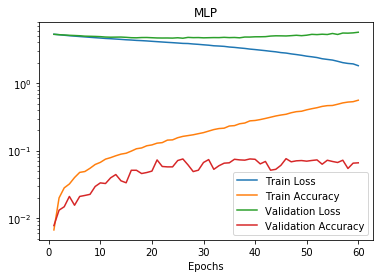

In [0]:
# USE THIS CODE CELL TO PLOT METRICS FOR THE MLP MODEL [Answer: Q2.d.2]
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(range(1,60+1), train_loss_m, label='Train Loss')
plt.plot(range(1,60+1), train_acc_m, label='Train Accuracy')
plt.plot(range(1,60+1), val_loss_m, label='Validation Loss')
plt.plot(range(1,60+1), val_acc_m, label='Validation Accuracy')
plt.title("MLP")
plt.legend()
plt.xlabel("Epochs")

plt.yscale("log")

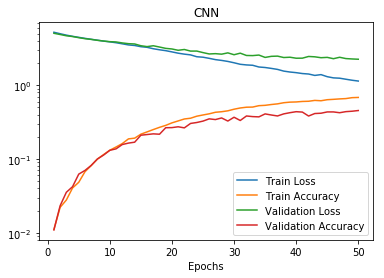

In [0]:
# USE THIS CODE CELL TO PLOT METRICS FOR THE CNN MODEL [Answer: Q2.d.3]
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(range(1,epoch+1), train_loss, label='Train Loss')
plt.plot(range(1,epoch+1), train_acc, label='Train Accuracy')
plt.plot(range(1,epoch+1), val_loss, label='Validation Loss')
plt.plot(range(1,epoch+1), val_acc, label='Validation Accuracy')
plt.title("CNN")
plt.legend()
plt.xlabel("Epochs")
plt.yscale("log")


<b>Answer for Q2.d.5:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>



I used categorical cross entropy loss function. I choose because there are multiple class and I used softmax activation as a last layer.Cross-entropy loss increases as the predicted probability diverges from the actual label.

<b>Answer for Q2.d.6:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

Explain how you selected the hyperparameters of the training phases for both MLP and CNN models.

For Mlp, I tried different image size and observed that when size gets smaller, the learning is increased. I choose learning rate 1e-3 according my experiment. I chose momentum 0.99 to learn faster, the more momentum rate caused rapid overfit. I chose number of neurons according to obsevation that, the more neuron likely to learn better. I choose batch size 128 to get stabil decrease for loss and as a regularization I applied batch normalization.

For CNN, I tried different image size and I chose 128x128x3, when the image size get smaller, the model cannot learn anything, for bigger size, the model cannot learn since it is not big to learn too much pixel information.  For learning rate and momentum rate I didnot change from mlp model. I increase number of kernel after each 3 convolution layer, since there are more high level feature than low level feature likes edges, blobs. As a regularization I used BatchNorm2d and BatchNorm1d layers and applied l2 regularization lambda = 1e-3. 



### Q2.e. Test MLP & CNN Networks - 9 pts

You should have obtained two trained networks so far. One of them comes from the MLP model and the other is from the CNN model. In this part, you need to compare these two trained networks by using the test set.

1. <font color=blue>\[Code\]</font> Load saved '.pth' file for the MLP model. Test this model by using the test set.
2. <font color=blue>\[Code\]</font> Load saved '.pth' file for the CNN model. Test this model by using the test set.
3. <font color=blue>\[Figure\]</font> Display randomly selected 20 images from the test set with the predicted and ground truth labels. Show these images in a grid (4x5).
3. <font color=blue>\[Written\]</font> Give the top-1 and top-5 accuracy values on the test set for the MLP and the CNN models. Which architecture does work better than the other? Explain why.

In [0]:
# USE THIS CODE CELL TO IMPLEMENT TEST FUNCTION WHICH IS COMMON FOR BOTH MODEL

# --- Representative Code Snippet ---
# def test(**kwargs):

def test(model, criterion, optimizer, test_loader):
  model.eval()
  test_loss = []
  test_acc =[]
  test_acc5 = []
  label = []
  output = []
  image = [] 

  with torch.no_grad():

      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          loss = criterion(outputs, labels)
          output.extend(np.argmax(outputs.cpu().numpy(),axis=1))
          label.extend(labels.cpu().numpy())
          image.extend(images.cpu().numpy())
          test_loss.append(loss.item())
          test_acc.append(model.accuracy_topk(outputs, labels, (1,)))
          test_acc5.append(model.accuracy_topk(outputs, labels, (5,)))

  return np.mean(test_loss), np.mean(test_acc), np.mean(test_acc5), np.array(output), np.array(label), np.array(image)


In [0]:
# USE THIS CODE CELL TO LOAD BEST MLP MODEL
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

# --- Representative Code Snippet ---
# testloader = torch.utils.data.DataLoader(test_dataset, batch_size=n_batch, num_workers=n_workers)
# model = MLP(**kwargs)
# model.load_state_dict(torch.load(BEST_MLP_PATH))
# model.eval()
# test(model)

checkpoint = torch.load(BEST_MLP_PATH)
size = 32
batch_size = 128
epoch = 50
lr=1e-3
momentum=0.99
weight_decay = 0.000
device = "cuda"

model = MLP(input_size=size*size).cuda()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay = weight_decay, nesterov=True)
criterion = nn.CrossEntropyLoss()


model.load_state_dict(checkpoint["model"])
optimizer.load_state_dict(checkpoint['optimizer'])



model.eval()
np.random.seed(0)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
train_loader,val_loader, test_loader  = load_dataset(root_dir,img_size = size, batch_size=batch_size,is_cnn=False)
loss_t, acc_t, acc5_t, outputs, labels, images = test(model, criterion, optimizer, test_loader)
print("Test Accuracy Top-5 : {} Test Accuracy : {} Test Loss  : {} ".format(acc5_t, acc_t, loss_t))

Test Accuracy Top-5 : 0.19448237121105194 Test Accuracy : 0.06681355834007263 Test Loss  : 5.111400579151354 


In [0]:
# USE THIS CODE CELL TO LOAD BEST CNN MODEL
# LOAD TEST SAMPLES
# GET THE TEST RESULTS, PRINT OUT TEST METRICS

# --- Representative Code Snippet ---
# testloader = torch.utils.data.DataLoader(test_dataset, batch_size=n_batch, num_workers=n_workers)
# model = CNN(**kwargs)
# model.load_state_dict(torch.load(BEST_CNN_PATH))
# model.eval()
# test(model)
#del model
size = 128
batch_size = 16
epoch = 50
lr=1e-3
momentum=0.99
weight_decay = 0.001
device  ='cuda'

model = ConvNet(input_shape=(size,size,3)).cuda()
optimizer = optim.SGD(model.parameters(), lr=lr , momentum=momentum, weight_decay = weight_decay, nesterov=True)
criterion = nn.CrossEntropyLoss()


checkpoint = torch.load(BEST_CNN_PATH)

model.load_state_dict(checkpoint["model"])
optimizer.load_state_dict(checkpoint['optimizer'])



model.eval()
np.random.seed(0)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
train_loader,val_loader, test_loader  = load_dataset(root_dir,img_size = size, batch_size=batch_size,is_cnn=True)
loss_t_c, acc_t_c, acc5_t_c, outputs_c, labels_c, images_c = test(model, criterion, optimizer, test_loader)
print("Test Accuracy Top-5 : {} Test Accuracy : {} Test Loss  : {} ".format(acc5_t_c, acc_t_c, loss_t_c))

Test Accuracy Top-5 : 0.7364020347595215 Test Accuracy : 0.43944254517555237 Test Loss  : 2.2877626286165134 


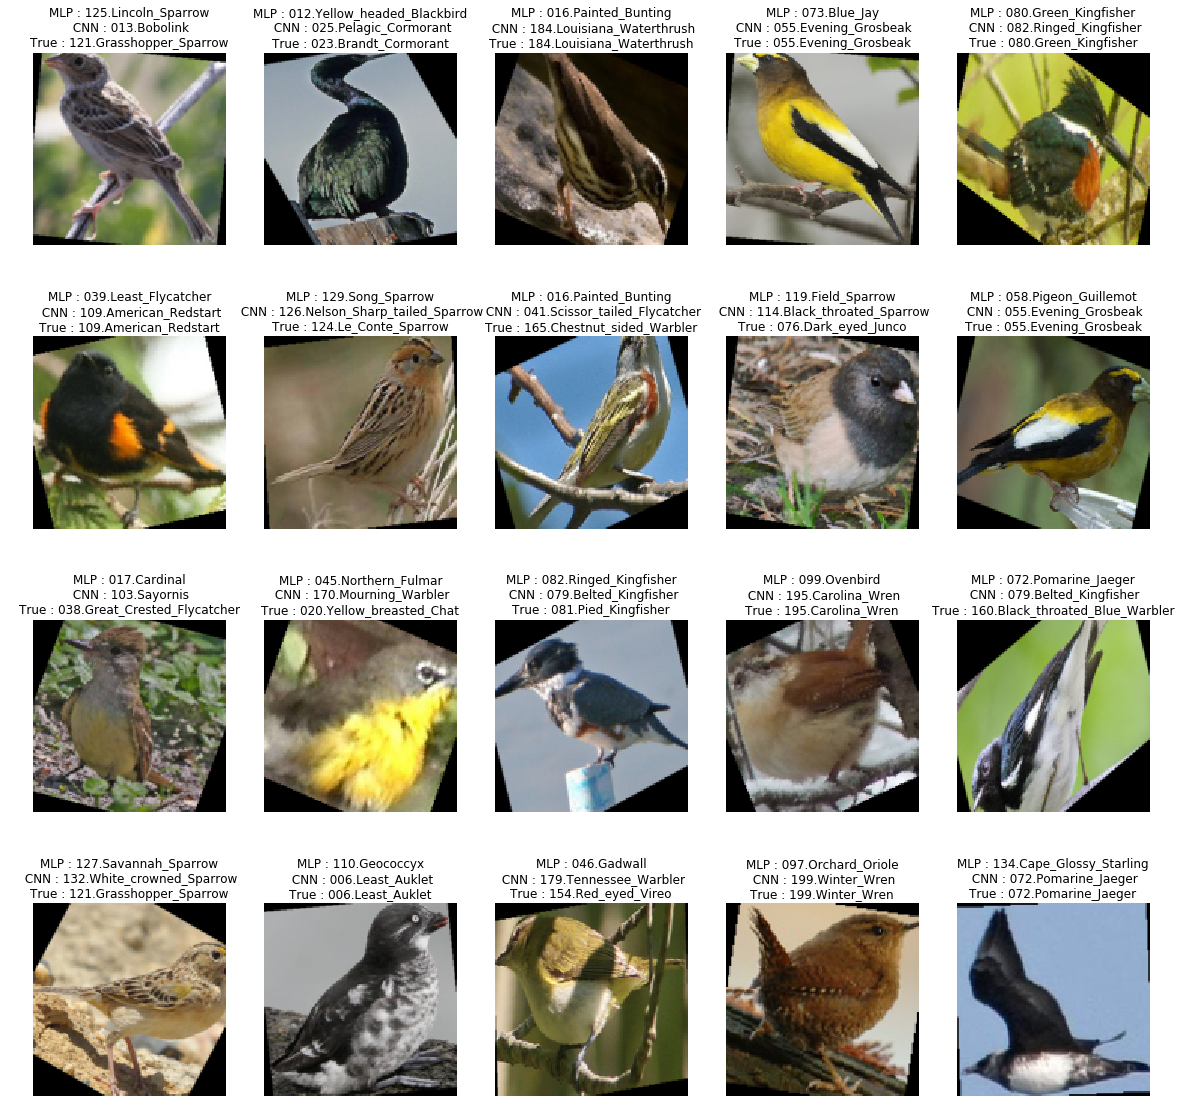

In [0]:
# USE THIS CODE CELL TO DISPLAY RANDOMLY SELECTED TEST SAMPLES WITH THEIR PREDICTED AND TARGET LABELS [Answer: Q2.e.3]

import random

random.seed(2019)

random_images = random.sample(range(0, images.shape[0]), 20)

imagesx = images_c[random_images] 

outputsx = outputs[random_images]
labelsx = labels[random_images]
outputsy = outputs_c[random_images]
_, axs = plt.subplots(4, 5, figsize=(20, 20))
axs = axs.flatten()
classes = train_loader.dataset.classes
for i, img, ax in zip(range(20),imagesx, axs):
    img = img.transpose((1, 2, 0))
  
    inp =  img 
    inp *= 255.0
    
    ax.title.set_text("MLP : {}\n CNN : {}\nTrue : {}".format(str(classes[outputsx[i]]),str(classes[outputsy[i]]), str(classes[labelsx[i]])))
    ax.axis("off")
    ax.imshow(inp.astype(np.uint8))
plt.show()

<b>Answer for Q2.e.4:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

MLP model ==> Test Accuracy Top-5 : 0.1972597986459732 Test Accuracy : 0.06942030787467957 Test Loss  : 4.78748459565012 
<br>
CNN model ==> Test Accuracy Top-5 : 0.7777872085571289 Test Accuracy : 0.48006758093833923 Test Loss  : 2.094012951931438 

CNN model worked better because convolution could learn local features, gradients of neigboor pixels, however, for mlp model, we lose locality information and flatten the image and also RGB image is used for CNN and grayscale image used for MLP therefore the mlp model lose that color information as well.

### Q2.f. Activation and Feature Map Visualization - 15 pts 

You have trained your CNN model. For this trained network, you will visualize the weights and outputs of the randomly selected (at most) 100 filters (feature maps) from the last convolutional layer, as images in a square grid format (10x10). You should select a single image from the test set to display its activation maps extracted from selected 100 filters. 

1. <font color=blue>\[Figure\]</font> Select an image from the test set and display it.
2. <font color=blue>\[Figure\]</font> Display the weights of randomly selected at most 100 filters from the last convolutional layer. Each filter weight should be represented as an image in a square grid.
3. <font color=blue>\[Figure\]</font> For the selected sample, compute the activation maps for the 100 filters (from 2nd question). Display each activation map as an image in a square grid (10x10).
4. <font color=blue>\[Written\]</font> Explain what these activation maps represent and why they are important.

(128, 128, 3)


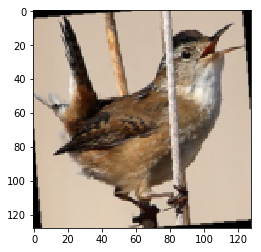

In [0]:
# USE THIS CODE CELL TO DISPLAY SELECTED SINGLE SAMPLE FROM TEST SET [Answer: Q2.f.1]
import random 
import matplotlib.pyplot as plt 
%matplotlib inline


random_img = 512#random.randint(0,images.shape[0]-1)

imgf = images_c[random_img] 

imgx = imgf.transpose((1, 2, 0)) *255.0
print(imgx.shape)
plt.imshow(imgx.astype(np.uint8))

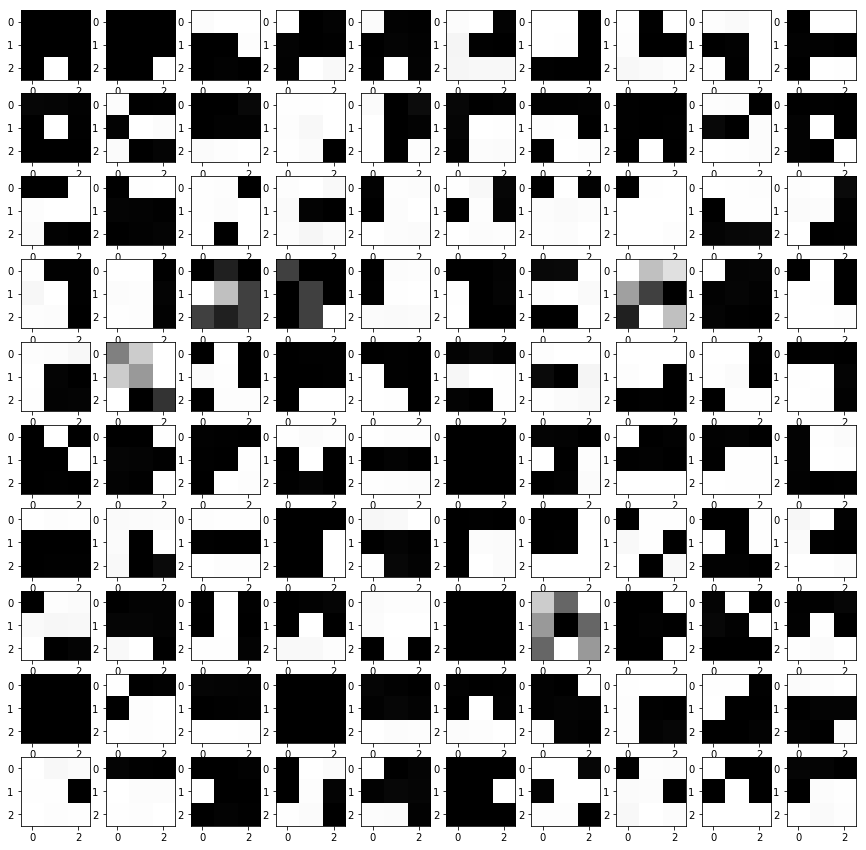

In [0]:
# USE THIS CODE CELL TO DISPLAY WEIGHTS OF THE SELECTED KERNELS [Answer: Q2.f.2]
import random 
random.seed(2020)
random_kernels = random.sample(range(0, 512), 100)
weights = model.cnn_net[4].cnn[6].weight.clone().cpu().data.numpy()[:,0,:,:]
random_weights = weights[random_kernels]
_, axs = plt.subplots(10, 10, figsize=(15, 15))
axs = axs.flatten()
classes = train_loader.dataset.classes
for i, img, ax in zip(range(100),random_weights, axs):
    
  
    inp =  img 
    #inp = np.clip(inp, 0, 1)
    inp *= 255.0
    
    
    ax.imshow(inp.astype(np.uint8), cmap = plt.get_cmap("gray"))
plt.show()

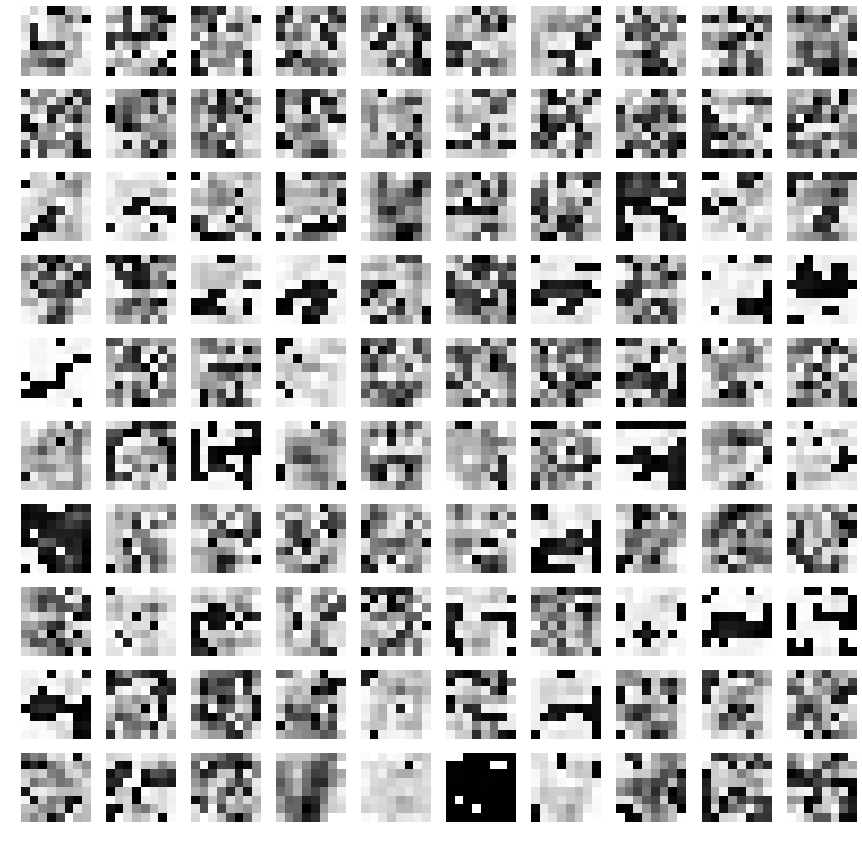

In [0]:
# USE THIS CODE CELL TO DISPLAY OUTPUTS OF THE SELECTED KERNELS [Answer: Q2.f.3]
imgy = np.expand_dims(imgf, axis=0)
x = torch.from_numpy(imgy).float().to(device)
model.eval()
for i,layer in enumerate(model.cnn_net[:5]):
  for j, lay in enumerate(layer.cnn):
    if i == 4 and j == 7:
      break
    x = lay(x) 
x = np.squeeze(x)
_, axs = plt.subplots(10, 10, figsize=(15, 15))
axs = axs.flatten()
classes = train_loader.dataset.classes
for i, img, ax in zip(range(100),x.clone().cpu().detach().numpy(), axs):
    
    inp =  img 
    #inp = np.clip(inp, 0, 1)
    inp *= 255.0
    
    ax.axis('off')
    ax.imshow(inp.astype(np.uint8), cmap=plt.get_cmap("gray") )
plt.show()

<b>Answer for Q2.f.4:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>



the feature maps represents the encoded high level information for the image. Using these features, mlp model could learn easily since the features is encoded very well with convolution layers. It represent encoded information of the image basically.